# Cleaner notebook for compare FM project </br>

Using new coding strategies learned for organization and automation. </br>

Working from: *"C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2"* </br>
Output demod in: *"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue"* </br>
Output for metrics: *"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue* </br>



In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Image loading
AMU_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/sub-amuVC_fmap_Hz.nii.gz")
custom6_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/fms/PAM50_comp/custom6_mb_Hz.nii.gz")
db0_030_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/FM_tests/ROMEO_results/test10_all_sc_smooth/B0.nii")


In [3]:
# Image to np data 
AMU_data = AMU_img.get_fdata()
custom6_data = custom6_img.get_fdata()
db0_30_data = db0_030_img.get_fdata()

In [4]:
# Mask loading + np.data
AMU_soft_tissue_mask_img= nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_soft_tissue_AMU_VC.nii.gz")
custom6_soft_tissue_mask_img = nib.load("C:/Users/User/msc_project/Image-processing-strategies/mask_control/projects/fm_comp_mk2/step2_soft_tissue_masks/mask_soft_tissue_measured_and_simulated.nii.gz")
# ROMEO is untouched for the first trial, no mask for ROMEO
AMU_soft_tissue_mask_data = AMU_soft_tissue_mask_img.get_fdata()
custom6_soft_tissue_mask_data = custom6_soft_tissue_mask_img.get_fdata()

In [9]:
# Calculate the average with masks
AMU_soft_demod_factor = np.mean(AMU_data[AMU_soft_tissue_mask_data==1])
print(AMU_soft_demod_factor,"Hz")

-261.83327465587246 Hz


In [10]:
# Now for custom6 
custom6_soft_demod_factor = np.mean(custom6_data[custom6_soft_tissue_mask_data==1])
print(custom6_soft_demod_factor,"Hz")

-231.3995713535578 Hz


In [11]:
# Perform demodulation by average only where theres soft tissue
AMU_soft_tissue_avg = AMU_data - AMU_soft_demod_factor
custom6_soft_tissue_avg = custom6_data - custom6_soft_demod_factor

In [13]:
demod_AMU_new_img = nib.Nifti1Image(AMU_soft_tissue_avg, affine = AMU_img.affine)
demod_custom6_new_img= nib.Nifti1Image(custom6_soft_tissue_avg, affine = custom6_img.affine)

In [14]:
# Save new demoded
nib.save(demod_AMU_new_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz")
nib.save(demod_custom6_new_img, "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz")

## Loading non-demodulated Fieldmaps for comparisons


In [45]:
path_to_extract_metric_no_demod_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/no_demod"

#########
AMU_CV_csv = os.path.join(path_to_extract_metric_no_demod_folder, "AMU_VC_extract_metrics.csv")
df_amu_cv= pd.read_csv(AMU_CV_csv)
AMU_CV_wa_data = df_amu_cv['WA()']

db0_30_csv = os.path.join(path_to_extract_metric_no_demod_folder, "db0_030_metrics.csv")
df_db0_030 = pd.read_csv(db0_30_csv)
db0_030_wa_data = df_db0_030['WA()']

custom6_csv = os.path.join(path_to_extract_metric_no_demod_folder, "custom6_extract_metrics.csv")
df_custom6 = pd.read_csv(custom6_csv)
custom6_wa_data = df_custom6['WA()']

vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

## Extracting metrics with SCT

In [15]:
# For custom 6, only replace the -i folder and indicate the demod output folder under extract_metrics
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz" -method wa -vert 4:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_custom6_extract_metrics.csv" -perlevel 1



--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_custom6.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/custom6_mb_sc.nii.gz -method wa -vert 4:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sc_labeled_c4t7.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_custom6_extract_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: custom6_mb_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_

In [22]:
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz" -perlevel 1 -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_AMU_VC_extract_metrics.csv"


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_soft_tissue_AMU.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/spinal_cord_AMU_VC.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/charles_PAM50/eroded3_vert_labels_AMU_VC.nii.gz -perlevel 1 -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_AMU_VC_extract_metrics.csv
--


Load metric image...
Estimation for label: spinal_cord_AMU_VC

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extr

## Plotting metrics from CSV

In [23]:
path_to_demod_extract_metric_folder = "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue"

#########
demod_AMU_CV_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_AMU_VC_extract_metrics.csv")
demod_df_amu_cv= pd.read_csv(demod_AMU_CV_csv)
demod_AMU_CV_wa_data = demod_df_amu_cv['WA()']

#demod_db0_30_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_db0_030_metrics.csv")
# Because we didn't demod db030 and we don't really want a manipullated db030 we are loading directly
no_demod_df_db0_030 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/no_demod/db0_030_metrics.csv")
no_demod_db0_030_wa_data = no_demod_df_db0_030['WA()']

demod_custom6_csv = os.path.join(path_to_demod_extract_metric_folder, "demod_custom6_extract_metrics.csv")
demod_df_custom6 = pd.read_csv(demod_custom6_csv)
demod_custom6_wa_data = demod_df_custom6['WA()']


In [24]:
# Vertebrae levels:
vertebrae_levels_c1_t7 = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
vertebrae_levels_c4_t7 = ['C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

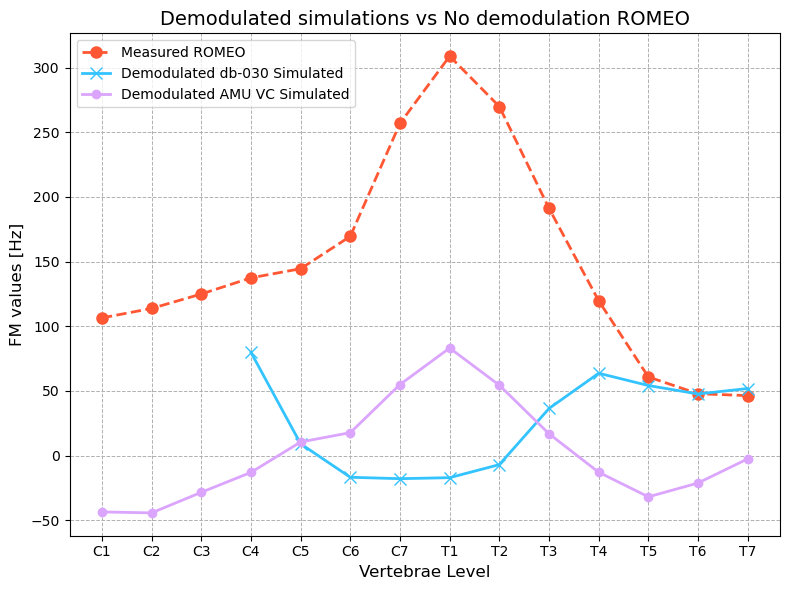

In [28]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, demod_custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, demod_AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='Demodulated AMU VC Simulated', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated simulations vs No demodulation ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

## Trying with Measured demodulated to the AVG of simulated ROI 

In [39]:
# Demodulate the measured FM using the average values from the simulated FM
db0_030_demod = db0_30_data + custom6_soft_demod_factor
demod_db0_030_new_img = nib.Nifti1Image(db0_030_demod, affine = db0_030_img.affine)
nib.save(demod_db0_030_new_img,"C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz")

In [40]:
# For ROMEO FM - in vivo
!sct_extract_metric -i "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz" -f "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz" -method wa -vert 1:14 -vertfile "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz" -o "C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv" -perlevel 1


--
Spinal Cord Toolbox (6.2)

sct_extract_metric -i C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/demodulated/avg_soft_tissue/demod_db0_030_img.nii.gz -f C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/only_sc.nii.gz -method wa -vert 1:14 -vertfile C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/testing_3_echoes/label_vertebrae/sct_output/only_sc_labeled.nii.gz -o C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv -perlevel 1
--


Load metric image...
Estimation for label: only_sc

Done! To view results, type:
start C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod

In [41]:
demod_df_db0_030 = pd.read_csv("C:/Users/User/msc_project/Image-processing-strategies/compare_fieldmap/data/lung_fitting_project/manually_simulated/extract_metrics/avg_soft_tissue/demod_db0_030_metrics.csv")
demod_db0_030_wa_data = demod_df_db0_030['WA()']

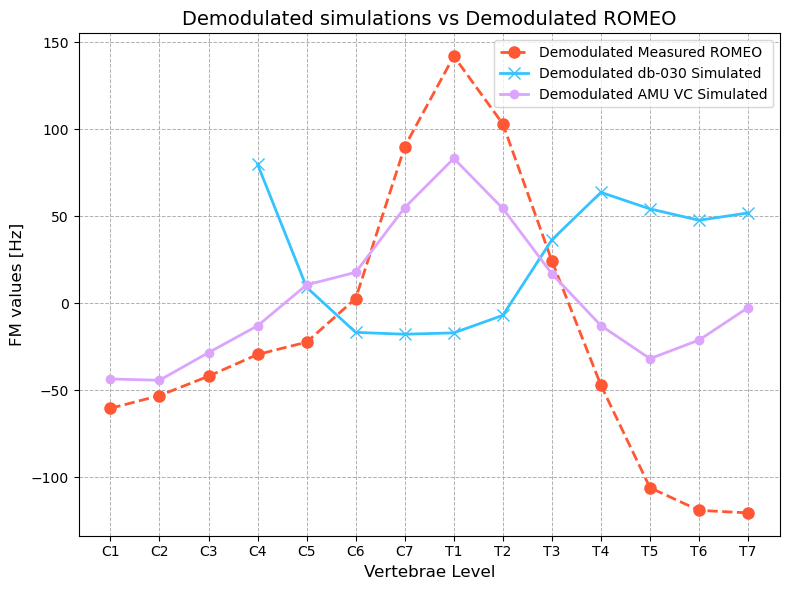

In [31]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, demod_custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='Demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, demod_AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='Demodulated AMU VC Simulated', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('Demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

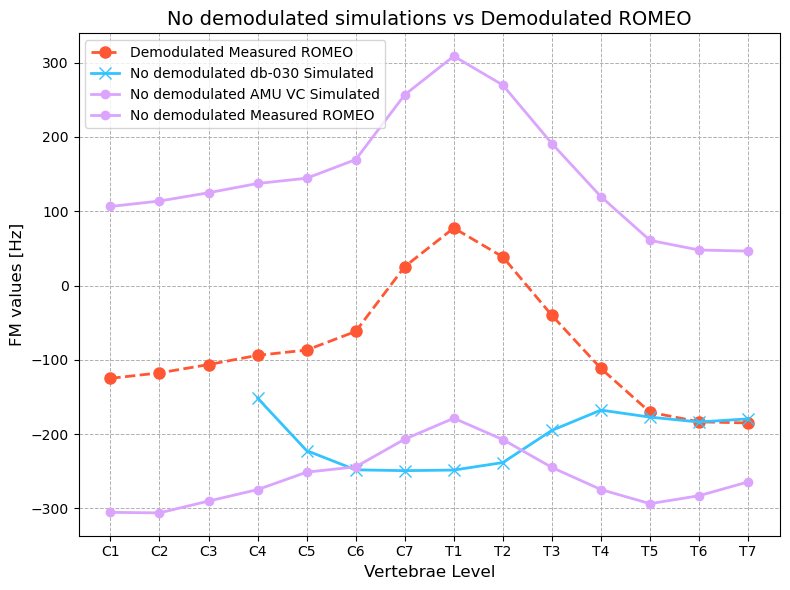

In [44]:
# Demodulated simulations with no demod GRE
# Create the plot
plt.figure(figsize=(8, 6))

# ROMEO
plt.plot(vertebrae_levels_c1_t7, demod_db0_030_wa_data, marker = 'o', color = '#FF5733', linestyle='--', linewidth = 2, markersize = 8, label = "Demodulated Measured ROMEO")
plt.plot(vertebrae_levels_c4_t7, custom6_wa_data, marker = 'x', color = '#33C3FF', linestyle='-', linewidth = 2, markersize = 8, label ='No demodulated db-030 Simulated')
plt.plot(vertebrae_levels_c1_t7, AMU_CV_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated AMU VC Simulated', linewidth=2)
plt.plot(vertebrae_levels_c1_t7, no_demod_db0_030_wa_data, marker='o', linestyle='-', color='#DBA5FD', label='No demodulated Measured ROMEO', linewidth=2)
# Plot Simulated demodulated values
#plt.plot(vertebrae_levels_c7_t7, abs_sim_custom3, )


# Add titles and labels
plt.title('No demodulated simulations vs Demodulated ROMEO', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('FM values [Hz]', fontsize=12)

plt.legend()
# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()